1. To get the pruned model, run: 
    > python main.py --experiment prune-only --pruner synflow --prune-epochs 2 --post-epochs 0 --model conv --save-pruned

2. Results will get saved in "Results/pruned/default/{model_name}/{pruner}/{epoch}_prune.pth"
3. In the get_model function, choose which epoch to load

In [79]:
import os
print(os.getcwd())
import sys
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

/home/udit/programs/Synaptic-Flow/Notebooks
/home/udit/programs/Synaptic-Flow


In [80]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
from load_pruned import get_model
import numpy as np
from numpy.linalg import svd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
def get_per_layer_masked_weights_for_epoch(model):
    layer_dict = {}
    for name, param in model.state_dict().items():
        it, weight = name.split('.')
        if 'bias' not in name:
            if it in layer_dict:
                existing_weight = layer_dict[it]
                masked_weight = np.multiply(param.numpy(), existing_weight)
                layer_dict[it] = masked_weight
            else:
                layer_dict[it] = param.numpy()
    return layer_dict

def get_per_layer_singular_values(masked_weights_dict):
    per_layer_singular_values = {}

    for it, masked_weight in masked_weights_dict.items():
        s = svd(masked_weight, compute_uv=False)
        per_layer_singular_values[it] = s.tolist()
    
    return per_layer_singular_values


def plot_per_epoch_singular_values(model="fc", dataset="mnist", prune_type="default", epoch=0):
    model = get_model(dataset, prune_type, model, epoch=epoch)
    per_layer_masked_weights = get_per_layer_masked_weights_for_epoch(model)
    per_layer_singular_values = get_per_layer_singular_values(per_layer_masked_weights)
    df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in per_layer_singular_values.items() ]))
    sns.catplot(data=df)
    plt.show()
    
    
def plot_per_layer_singular_values(model="fc", dataset="mnist", prune_type="default", total_epochs=1):
    for epoch in range(total_epochs):
        print("EPOCH: ", epoch)
        plot_per_epoch_singular_values(model=model, dataset=dataset, prune_type=prune_type, epoch=epoch)
    


EPOCH:  0
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/0_prune.pth


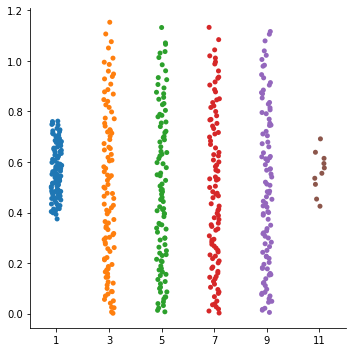

EPOCH:  1
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/1_prune.pth


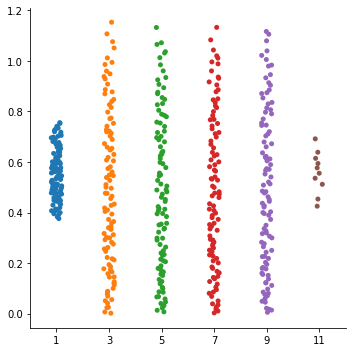

EPOCH:  2
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/2_prune.pth


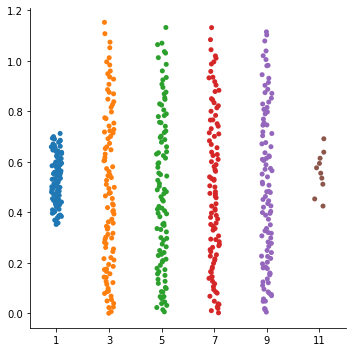

EPOCH:  3
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/3_prune.pth


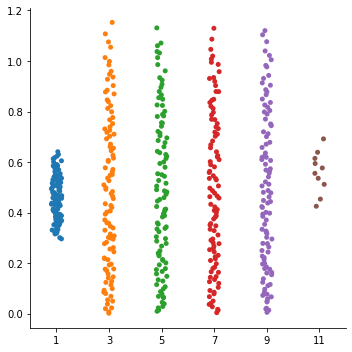

EPOCH:  4
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/4_prune.pth


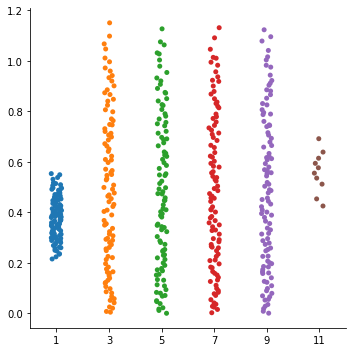

EPOCH:  5
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/5_prune.pth


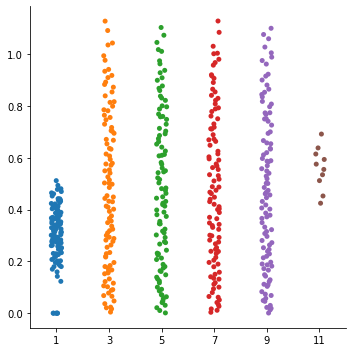

EPOCH:  6
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/6_prune.pth


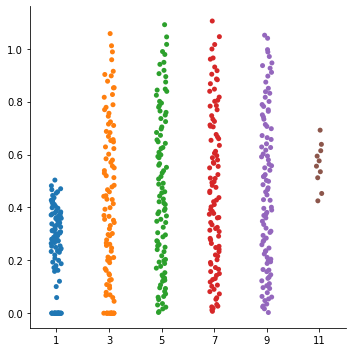

EPOCH:  7
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/7_prune.pth


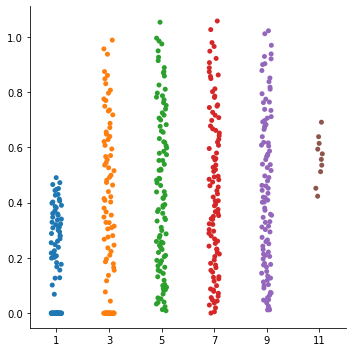

EPOCH:  8
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/8_prune.pth


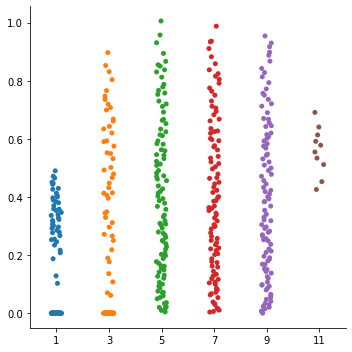

EPOCH:  9
Loading mnist dataset.
Creating default-fc model.
Loading model from: ../Results/pruned/default/fc/synflow/9_prune.pth


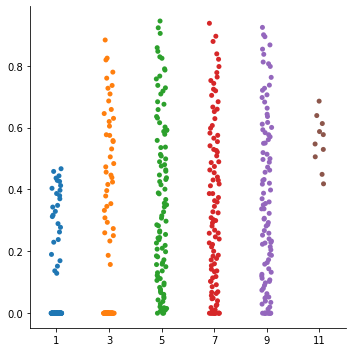

In [104]:
plot_per_layer_singular_values("fc", "mnist", "default", 10)